# Time independent Schrodinger Equation


In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# We make a function for producing the typical forward difference matrix
def forward_diff_mat(nodes):
    return np.diag([-2]*nodes,0) + np.diag([1]*(nodes-1),1) + np.diag([1]*(nodes-1),-1)

# A function which will show the matrix as a plot with a colour bar, so we can read the values
def matshow_cbar(mat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(mat)
    fig.colorbar(cax)

$$ \left( -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V \right)\psi = E\psi$$

In [6]:
# Setting some constants
q = 1.602*10**-19                   # Electron charge
hbar = 1.054*10**-34
m = 9.109*10**-31                   # Electron mass

# Step 1 - System configurations 
well_height = 100                   # Electron volts
well_width = 1*10**-9               # Meters, how wide my potential well is
system_width = 2*well_width         # How wide the simulation system is
nodes = 500                         # Our number of nodes

# Pre-calculations
a = system_width/nodes              # Distance between nodes (dx)
t = hbar**2/(2*m*a**2)/q            # Normalise system to eV
x_vector = np.arange(nodes)*a

Text(0, 0.5, 'Potential, eV')

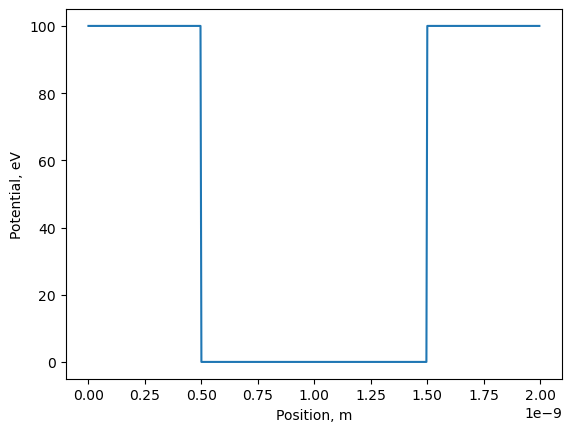

In [7]:
# Defining our potential V

V = np.zeros(nodes)

# This one is zero in the middle and high values everywhere else.
well_size = round(nodes/(system_width/well_width))   # How wide is our well in nodes?
well_start = round((nodes - well_size) / 2)           # What node does our well start at?
# Add the walls to our well
V[0:well_start] = well_height
V[well_size+well_start:] = well_height

plt.plot(x_vector,V)
plt.xlabel('Position, m')
plt.ylabel('Potential, eV')

Text(0, 0.5, 'Potential, eV')

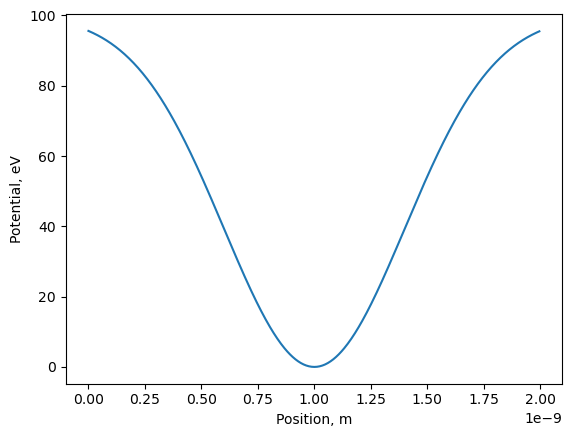

In [8]:
# esc + r to convert to raw, esc + y to convert to code
# Defining our potential V with an arbitrary function

V = np.zeros(nodes)

for i in range(nodes):
    V[i] = well_height*(1 -1*np.exp(-(i - nodes/2)**2/20000))
    #V[i] = V[i] + well_height*(1*np.exp(-(i - nodes/2)**2/100))
    #V[i] = V[i] + well_height*(1*np.exp(-(i - nodes/3)**2/100))
    
plt.plot(x_vector,V)
plt.xlabel('Position, m')
plt.ylabel('Potential, eV')

Discretisation of second derivative 

\begin{align} 
x_1:& -t(\psi_2 - 2\psi_1 + \psi_0) + V_1 \psi_1 = E\psi_1 \\ 
x_2:& -t(\psi_3 - 2\psi_2 + \psi_1) + V_1 \psi_2 = E\psi_2
\end{align}

[[ 4853.64561117 -2379.01965227     0.         ...     0.
      0.             0.        ]
 [-2379.01965227  4853.53460953 -2379.01965227 ...     0.
      0.             0.        ]
 [    0.         -2379.01965227  4853.42126539 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...  4853.30554276
  -2379.01965227     0.        ]
 [    0.             0.             0.         ... -2379.01965227
   4853.42126539 -2379.01965227]
 [    0.             0.             0.         ...     0.
  -2379.01965227  4853.53460953]]


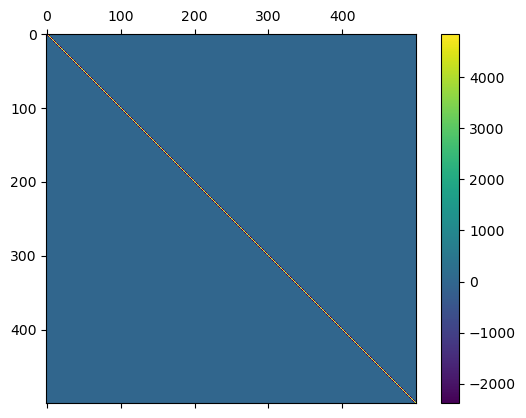

In [9]:
# Making our hamiltonian

Tri = -1*t*forward_diff_mat(nodes)

H = Tri + np.diag(V)
print(H)
matshow_cbar(H)

<Figure size 640x480 with 0 Axes>

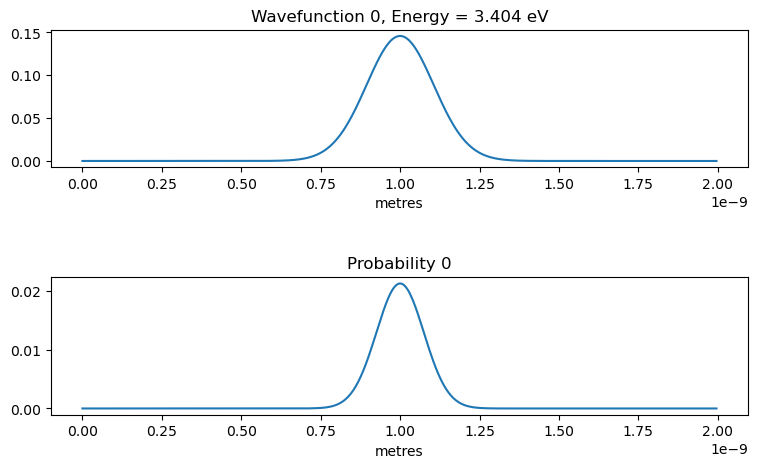

<Figure size 640x480 with 0 Axes>

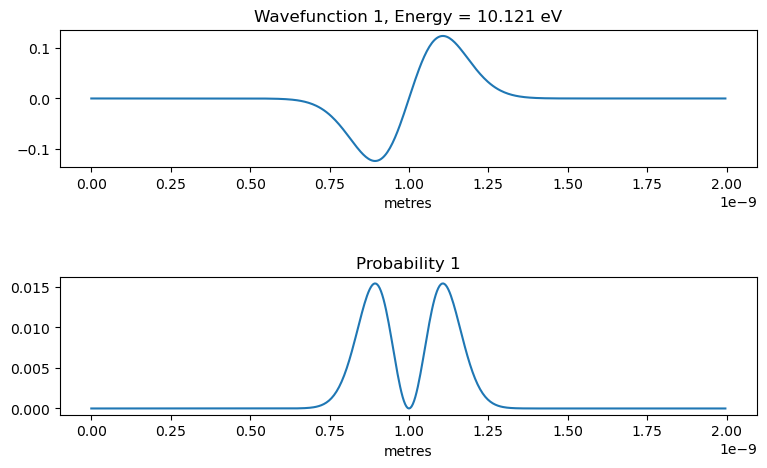

<Figure size 640x480 with 0 Axes>

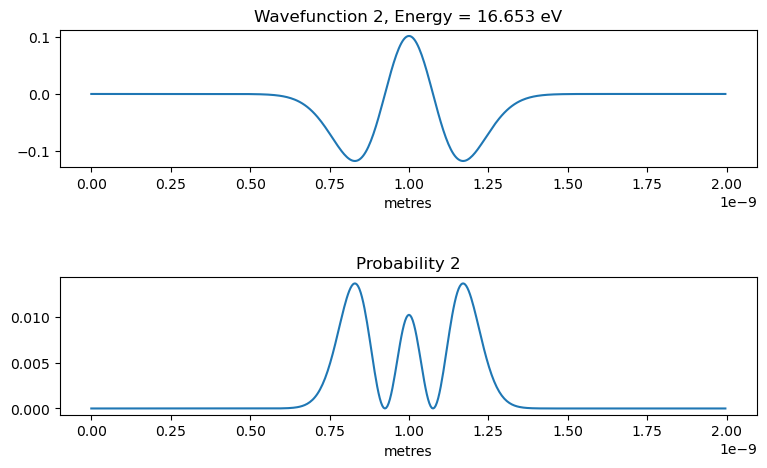

<Figure size 640x480 with 0 Axes>

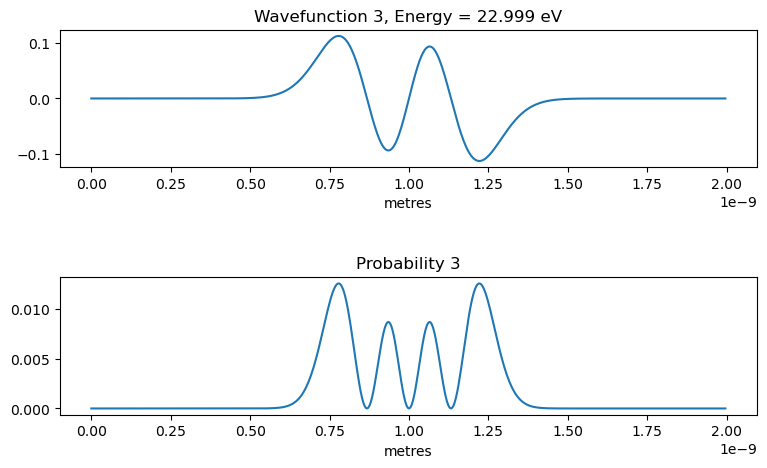

<Figure size 640x480 with 0 Axes>

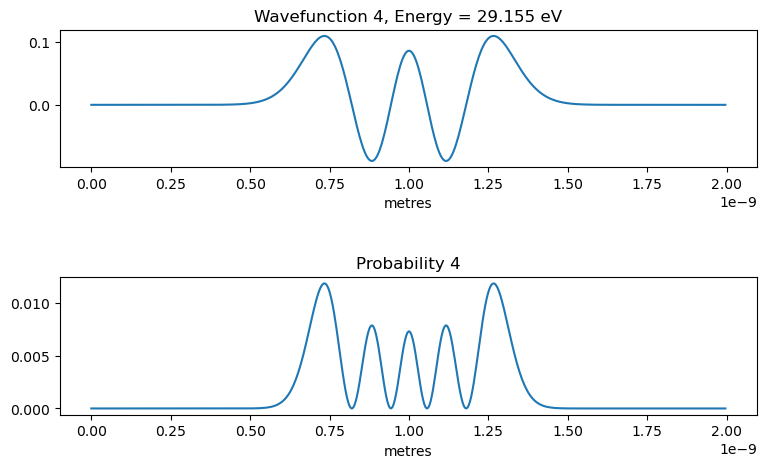

<Figure size 640x480 with 0 Axes>

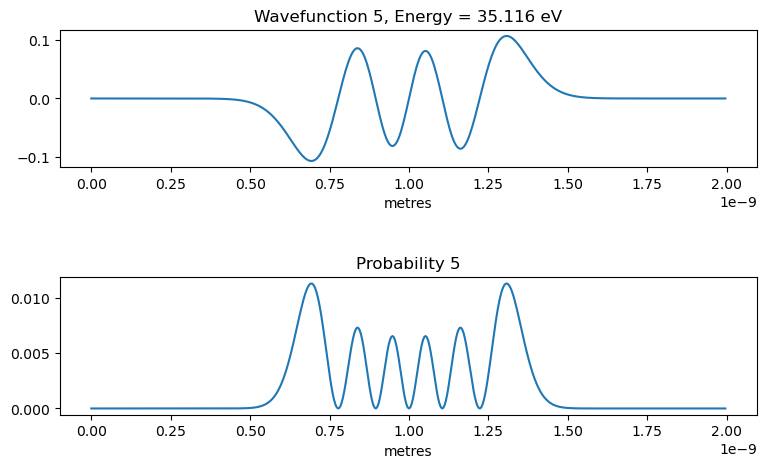

<Figure size 640x480 with 0 Axes>

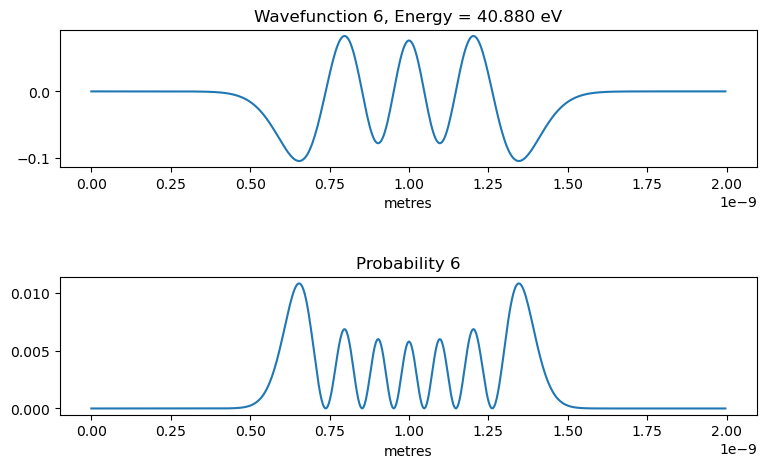

<Figure size 640x480 with 0 Axes>

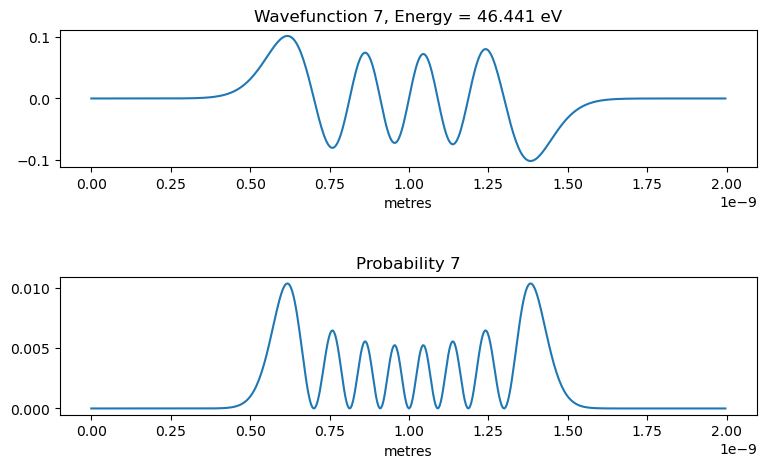

<Figure size 640x480 with 0 Axes>

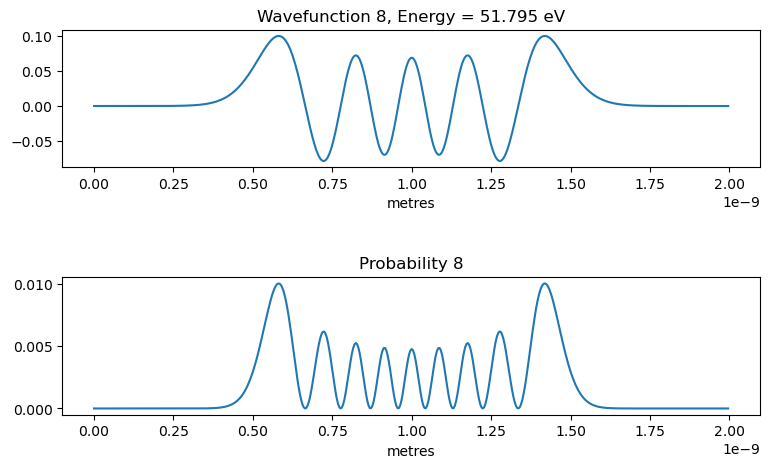

<Figure size 640x480 with 0 Axes>

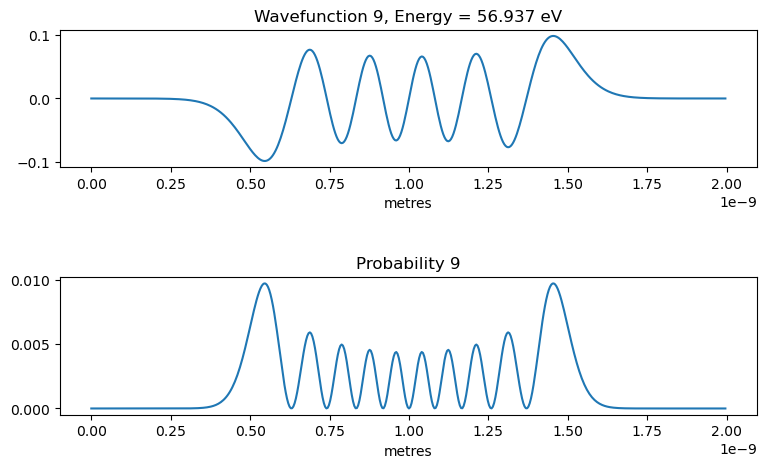

In [10]:
# Step 4 - Generate Solution
vals, vec = np.linalg.eigh(H)
# vals is the eigen values, vec is the eigen vectors (as a matrix)

# Step 5 - extract and plot!
max_order = 10
for i in range(max_order):
    plt.figure()
    fig, axs = plt.subplots(2, 1, figsize=(9, 5))
    fig.subplots_adjust(hspace=0.8)
    # Plot the wavefunction
    axs[0].plot(x_vector,vec[:,i])
    axs[0].set_title('Wavefunction ' + str(i) + ', Energy = ' + "{:.3f}".format(vals[i]) + ' eV')
    axs[0].set_xlabel('metres')
    
    # Plot the normalised probability
    axs[1].plot(x_vector,vec[:,i]*np.conj(vec[:,i]))
    axs[1].set_title('Probability ' + str(i))
    axs[1].set_xlabel('metres')

**Homework**

**Beginner**
1. Work through the code and understand each step.
2. Deterine the units of the Y axes for the wave function and probability.
3. Try to ruin things by picking strange values for parameters. What makes the simultion stop working, and why?

**Intermediate**
1. Calculate and plot the energy difference between the eigenstates. Are they what you expect?
2. Modify the potential well to be a harmonic potential well. Do you get the states that you expect to see?

**Advanced**
1. Modify the potential well to be a double well with a configurable-height and width barrier in the middle. Explore how the parameters of this barrier change the tunneling probability of the electron.

